#Synthesis of RNA sequences similar to given noncoding-RNA families



In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import logging
from eden.util import configure_logging
configure_logging(logging.getLogger(), verbosity=1, filename=None)

In [3]:
from rnasynth.rna_synthesizer import RNASynthesizerInitializer
synthesizer = RNASynthesizerInitializer(instance_score_threshold_in=0,
                                        instance_score_threshold_out=0,
                                        min_size_connected_component_sequence_constraint=2,
                                        importance_threshold_sequence_constraint=0,
                                        min_size_connected_component_structure_constraint=2,
                                        importance_threshold_structure_constraint=0,
                                        n_synthesized_seqs_per_seed_seq=2,
                                        vectorizer_complexity=3,
                                        max_num=5,
                                        negative_shuffle_ratio=5
                                       ).synthesizer

In [4]:
from evaluation.performance_evaluation import learning_curve

In [5]:
params = {'rfam_id':'RF00008', 'number_of_samples':None,'n_experiment_repetitions':3, 'train_to_test_split_ratio':0.2,
          'shuffle_order':2, 'negative_shuffle_ratio':2, 'vectorizer_complexity':2, 'data_fraction_lower_bound':0.1,
          'data_fraction_upper_bound':.5, 'data_fraction_chunks':5}     

In [6]:
%%time
roc_t, roc_s, apr_t, apr_s, data_fractions = learning_curve(params, synthesizer=synthesizer)

[0.10000000000000001, 0.20000000000000001, 0.30000000000000004, 0.40000000000000002, 0.5]
Starting RNA Synthesis experiment for RF00008 ...
Starting new HTTP connection (1): rfam.xfam.org
Training on data chunk 0/5 (data fraction: 0.1)
--------------------------------------------------------------------------------
run 1/3
Fit estimator on original data and evaluate the estimator.
Test set
Instances: 18 ; Features: 1048577 with an avg of 407 features per instance
--------------------------------------------------------------------------------
Test Estimate
             precision    recall  f1-score   support

         -1       1.00      0.33      0.50        12
          1       0.43      1.00      0.60         6

avg / total       0.81      0.56      0.53        18

APR: 0.887
ROC: 0.944
Fit estimator on original + sampled data and evaluate the estimator.
Test set
Instances: 18 ; Features: 1048577 with an avg of 404 features per instance
-----------------------------------------------

/home/kohvaeip/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Test set
Instances: 18 ; Features: 1048577 with an avg of 413 features per instance
--------------------------------------------------------------------------------
Test Estimate
             precision    recall  f1-score   support

         -1       0.00      0.00      0.00        12
          1       0.33      1.00      0.50         6

avg / total       0.11      0.33      0.17        18

APR: 1.000
ROC: 1.000
Fit estimator on original + sampled data and evaluate the estimator.
Test set
Instances: 18 ; Features: 1048577 with an avg of 414 features per instance
--------------------------------------------------------------------------------
Test Estimate
             precision    recall  f1-score   support

         -1       0.67      1.00      0.80        12
          1       0.00      0.00      0.00         6

avg / total       0.44      0.67      0.53        18

APR: 0.723
ROC: 0.736
--------------------------------------------------------------------------------
run 3/3
Fit estima

---

In [7]:
from evaluation.draw_utils import draw_learning_curve

delta = 0.005
scaling = 50

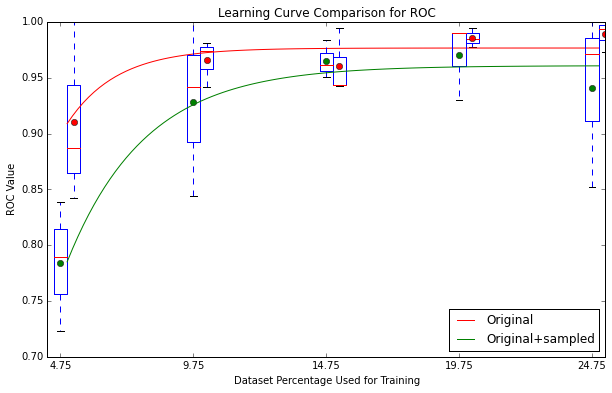

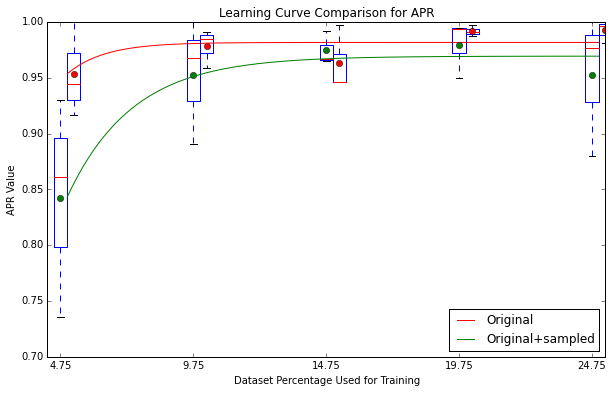

In [8]:
draw_learning_curve(data_a=roc_t, data_b=roc_s, x=data_fractions, measure='ROC', delta=delta, scaling=scaling,fname='roc1.jpg')
draw_learning_curve(data_a=apr_t, data_b=apr_s, x=data_fractions, measure='APR', delta=delta, scaling=scaling,fname='apr1.jpg')

In [9]:
synthesizer2 = RNASynthesizerInitializer(instance_score_threshold_in=0,
                                        instance_score_threshold_out=0,
                                        min_size_connected_component_sequence_constraint=2,
                                        importance_threshold_sequence_constraint=0.1,
                                        min_size_connected_component_structure_constraint=2,
                                        importance_threshold_structure_constraint=0.1,
                                        n_synthesized_seqs_per_seed_seq=2,
                                        vectorizer_complexity=3,
                                        max_num=5,
                                        negative_shuffle_ratio=5
                                       ).synthesizer

In [10]:
%%time
roc_t2, roc_s2, apr_t2, apr_s2, data_fractions = learning_curve(params, synthesizer=synthesizer2)

[0.10000000000000001, 0.20000000000000001, 0.30000000000000004, 0.40000000000000002, 0.5]
Starting RNA Synthesis experiment for RF00008 ...
Starting new HTTP connection (1): rfam.xfam.org
Training on data chunk 0/5 (data fraction: 0.1)
--------------------------------------------------------------------------------
run 1/3
Fit estimator on original data and evaluate the estimator.
Test set
Instances: 18 ; Features: 1048577 with an avg of 441 features per instance
--------------------------------------------------------------------------------
Test Estimate
             precision    recall  f1-score   support

         -1       0.00      0.00      0.00        12
          1       0.33      1.00      0.50         6

avg / total       0.11      0.33      0.17        18

APR: 0.882
ROC: 0.903
Fit estimator on original + sampled data and evaluate the estimator.
Test set
Instances: 18 ; Features: 1048577 with an avg of 444 features per instance
-----------------------------------------------

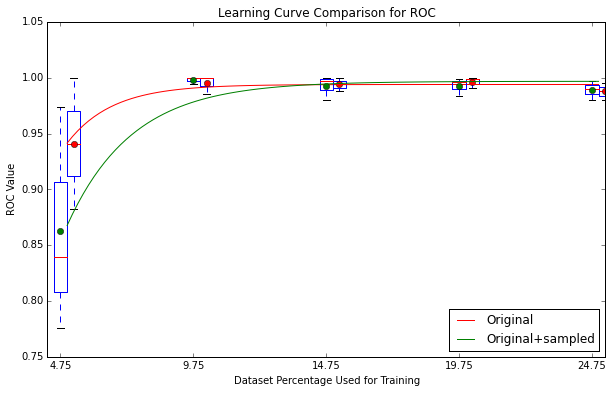

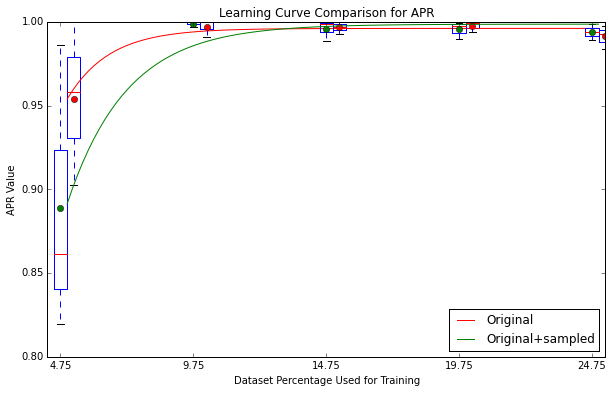

In [11]:
draw_learning_curve(data_a=roc_t2, data_b=roc_s2, x=data_fractions, measure='ROC', delta=delta, scaling=scaling,fname='roc2.jpg')
draw_learning_curve(data_a=apr_t2, data_b=apr_s2, x=data_fractions, measure='APR', delta=delta, scaling=scaling,fname='apr2.jpg')